# Never share your Wi‑Fi  Password Again 
An easy way to share your Wi‑Fi details using QR code generated by Python 

![](https://images.unsplash.com/photo-1550482781-48d477e61c72?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80)
image source : https://unsplash.com/photos/2HWkORIX3II/share

## Introduction 

How many this has happened with you, when your friend visits home and ask for Wi‑Fi details, and you have to run around to find the password... Let me help to ease this process.

In this article I am going to show you how to store the Wi‑Fi details in QR code using Python, and One can easily scan the QR code to get the details.

## What is a QR Code?
A Quick Response code is a two-dimensional pictographic code used for its fast readability and comparatively large storage capacity. The code consists of black modules arranged in a square pattern on a white background. The information encoded can be made up of any kind of data (e.g., binary, alphanumeric, or symbols)

## How to create QR code using Python 

Generating QR code using Python is fairly simple, Just one line of code and QR code will be ready.


We will use Python library [qrcode](https://pypi.org/project/qrcode/), Lets Install & Import the Library. 

In [1]:
!pip install qrcode --quiet
import qrcode

We will use `qrcode.make()` method to generate the QR code, In this method you can pass the data you need to share via QR code which can be scanned by compatible device. In following example I have created a QR code pointing to my medium.com profile. 

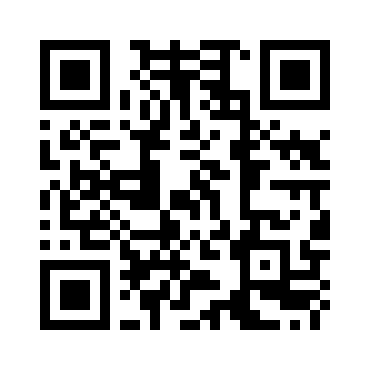

In [2]:
qrcode.make('https://medium.com/@vinodvidhole')

Lets try to scan this QR code and see if this works.

![](https://imgur.com/G7nGjXZ.gif)

Scanning was done smoothly and its pointed to correct url (https://medium.com/@vinodvidhole).

QR code creation is was like a cake walk, let's move ahead with the next step 

## QR Code Generation for Wi-Fi

### Joining a Wi‑Fi network
Generally end-users point of view to connect any Wi-Fi network you will need 2 things
1. Network Name (SSID) of the current connection.
2. Password to connect the network.

Users can select the available network and the enter the password manually to join the Wi-Fi network.


### A QR code to automatically join a Wi‑Fi network
We would need to pass the Network Name (SSID), encryption type (WEP, WPA or blank) and password in the specific format in the `qrcode.make` method. Mobile device users can quickly scan and join networks without having to manually enter the data.
```
Common format: WIFI:S:<SSID>;T:<WEP|WPA|blank>;P:<PASSWORD>;H:<true|false|blank>;;
Sample: WIFI:S:MySSID;T:WPA;P:MyPassW0rd;;
```

Lets try to implement this. 

First we will generate the Wi-Fi details in the above mentioned required format. In Python there is a way to enter the sensitive information like user id, passwords etc. So no one can accidentally share the info in the cloud. 

I am going to use `getpass()` from `getpass` Python module 

In [3]:
from getpass import getpass

In [4]:
sensitive_info = getpass()

········


In [5]:
print(sensitive_info)

test


Please see below how this works, I ran the code `sensitive_info = getpass()`. Then system prompts me to enter the information. and for demonstration purpose I have printed the values which I entered.

![](https://i.imgur.com/Mj4UkVr.gif)

Now lets enter the Network Name (SSID) and password information 

In [6]:
ssid =  getpass()

········


In [7]:
password = getpass()

········


In [8]:
security = 'WPA' # (one of WPA or WEP)

Now creating the required Wi-Fi format string 

In [9]:
wifi_data = 'WIFI:S:{};T:{};P:{};;'.format(ssid, security, password)

Now you can generate the QR code as shown above and pass the `wifi_data`

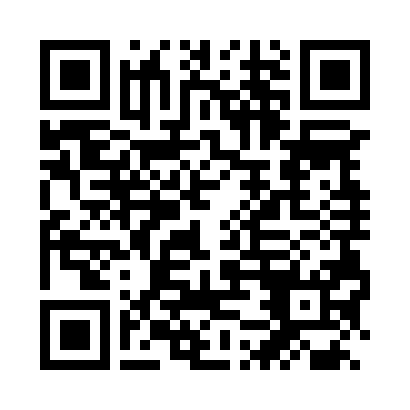

In [10]:
qrcode.make(wifi_data)

And there you have it, your scannable Wi-Fi QR code is ready. Lets check if its working.

![](https://imgur.com/bnEXOSz.gif)


I was able to join the Wi-Fi network using the QR code!!!

### Save the QR code Image 

Lets move ahead and try to implement in way that everyone can use it. Here i am trying to add a nice "Wi-Fi Logo" in the QR code and then we will save the QR code as image file (.png).

Idea is that anyone any enter the Wi-Fi and generate image file which can be printed for practical use.

In [11]:
from PIL import Image
from urllib.request import urlretrieve

Here I have created the QR code slightly different way since we need to stored it in image file, also function is created such a way the user can customize the QR code (Like changing color, logo etc.)

In [12]:
def generate_qr_code(logo_url, QR_Code_file_name = 'wifi_qr.png', QR_color = 'Black', QR_Back_color = 'white', pixels = 256):
    
    ssid =  getpass("Type Network Name (SSID) and press Enter ")
    password =  getpass("Type Password and press Enter ")
    security =  getpass("Type Security (WPA or WEP) and press Enter ")
    
    #generate wifi data string
    wifi_data = 'WIFI:S:{};T:{};P:{};;'.format(ssid, security, password)
    
    #download logo 
    urlretrieve(logo_url,'wifi_logo.png')
    wifi_logo = Image.open('wifi_logo.png')

    # taking base width
    basewidth = 100

    # adjust image size
    wpercent = (basewidth/float(wifi_logo.size[0]))
    hsize = int((float(wifi_logo.size[1])*float(wpercent)))
    wifi_logo = wifi_logo.resize((basewidth, hsize), Image.ANTIALIAS)
    #QRCode object 
    QR = qrcode.QRCode(version=1, #integer from 1 to 40 that controls the size of the QR Code (the smallest, version 1, is a 21x21 matrix)
                       error_correction=qrcode.constants.ERROR_CORRECT_H,
                       box_size=10
                      )

    # adding wifi data 
    QR.add_data(wifi_data)

    # generating QR code
    QR.make(fit=True)

    # adding color to QR code
    QR_image = QR.make_image(
        fill_color=QR_color,
        back_color=QR_Back_color
    ).convert('RGBA')
    
   
    # set size 
    pos = ((QR_image.size[0] - wifi_logo.size[0]) // 2,
        (QR_image.size[1] - wifi_logo.size[1]) // 2)
    
    QR_image.paste(wifi_logo, pos)
    
    QR_image = QR_image.resize((pixels, pixels), Image.NEAREST) 
    
    # save the image file 
    QR_image.save(QR_Code_file_name)

    print('QR code generated!')

Lets call the function. I have uploaded logo image [here](https://i.imgur.com/GeIxGmO.png) 

In [13]:
logo_url = 'https://i.imgur.com/GeIxGmO.png'
generate_qr_code(logo_url, 
                 QR_Code_file_name = 'wifi_qr.png')

Type Network Name (SSID) and press Enter ········
Type Password and press Enter ········
Type Security (WPA or WEP) and press Enter ········
QR code generated!


The `wifi_qr.png` file should be available in the File → Open Menu. You can download the file and print the image. 

![](https://i.imgur.com/HDR1Vlb.gif)

This concludes the tutorial.

## References

References to some useful links.<br>
- https://pypi.org/project/qrcode/
- https://en.wikipedia.org/wiki/QR_code#Joining_a_Wi%E2%80%91Fi_network 

## Conclusion

So next time if someone asks for the Wi-Fi details just show them the QR code!!! Usability of QR code is limitless. You can use this technique to share Contact details, Resume link, Website link etc. Hope you can build great projects using this article.

If you have any questions, feedback feel free to post a comment or contact me on [LinkedIn](https://www.linkedin.com/in/vinodvidhole/). Thank you for reading and Until next time… Happy coding !!